<a href="https://colab.research.google.com/github/rijalahmad77/Praktikum_G.231.21.0042/blob/main/UTS1_G_231_21_0042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

from google.colab import files
uploded = files.upload()

Saving CADdataset (1).csv to CADdataset (1).csv


mengupload dataset

In [3]:
#dataset
disease_df = pd.read_csv("CADdataset.csv")
disease_df.drop(['Age'], inplace = True, axis = 1)
disease_df.rename(columns = {'Sex':'Sex_Fmale'}, inplace = True)

disease_df.head(10)

,Weight,Height,Sex_Fmale,BMI,DM,HTN,Current Smoker,Obesity,DLP,BP,...,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN,CAD
0,90,175,Male,29.3877551,0,1,1,Y,Y,110,...,N,N,90.0,7.0,50.0,0.0,0.0,0.7,8.0,Cad
1,70,157,Fmale,28.398718,0,1,0,Y,N,140,...,N,N,80.0,26.0,40.0,4.0,0.0,1.0,30.0,Cad
2,54,164,Male,20.07733492,0,0,1,N,N,100,...,N,N,85.0,10.0,40.0,2.0,0.0,1.0,17.0,Cad
3,67,158,Fmale,26.83864765,0,1,0,Y,N,100,...,N,N,78.0,76.0,55.0,0.0,0.0,1.2,30.0,Normal
4,87,153,Fmale,37.16519287,0,1,0,Y,N,110,...,N,N,104.0,27.0,50.0,0.0,0.0,1.0,16.0,Normal
5,75,175,Male,24.48979592,0,0,1,N,N,118,...,N,N,86.0,18.0,50.0,0.0,0.0,1.0,13.0,Cad
6,80,165,Male,29.38475666,0,0,0,Y,N,110,...,N,N,80.0,38.0,40.0,4.0,1.0,0.8,12.0,Cad
7,80,175,Male,26.12244898,1,0,1,Y,Y,130,...,N,N,130.0,4.0,45.0,4.0,0.0,0.9,19.0,Cad
8,84,163,Fmale,31.61579284,0,0,0,Y,N,90,...,N,N,69.0,5.0,50.0,0.0,0.0,0.6,15.0,Normal
9,71,170,Male,24.56747405,1,0,0,N,N,130,...,N,N,209.0,8.0,40.0,2.0,0.0,1.3,16.0,Cad


membaca dataset
menghapus 'Age'
menganti column sex menjadi sex_fmale

In [5]:
disease_df.info()

# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.CAD.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weight              303 non-null    object 
 1   Height              303 non-null    object 
 2   Sex_Fmale           303 non-null    object 
 3   BMI                 303 non-null    object 
 4   DM                  303 non-null    object 
 5   HTN                 303 non-null    object 
 6   Current Smoker      303 non-null    object 
 7   Obesity             303 non-null    object 
 8   DLP                 303 non-null    object 
 9   BP                  303 non-null    object 
 10  WPE                 303 non-null    object 
 11  Typical Chest Pain  303 non-null    object 
 12  Atypical            303 non-null    object 
 13  Nonanginal          303 non-null    object 
 14  St Depression       303 non-null    object 
 15  Tinversion          303 non-null    object 
 16  LVH     

disease_df.info(): Menampilkan informasi tentang DataFrame
disease_df.dropna(axis=0, inplace=True): Menghapus baris yang mengandung nilai NaN atau NULL dari DataFrame
print(disease_df.head(), disease_df.shape): Menampilkan lima baris pertama dari DataFrame
print(disease_df.CAD.value_counts()): Menampilkan jumlah nilai unik dalam kolom 'CAD' (kemungkinan target variabel)

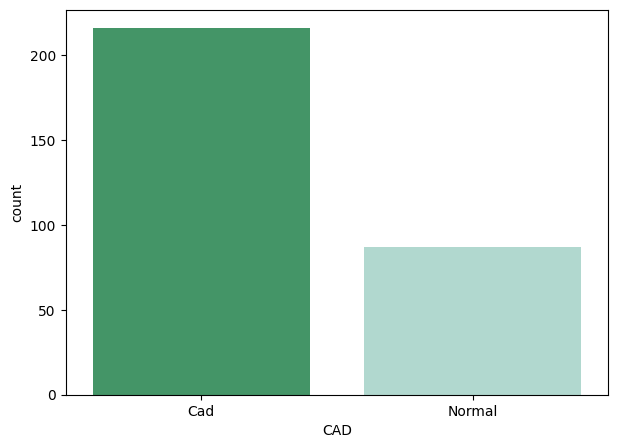

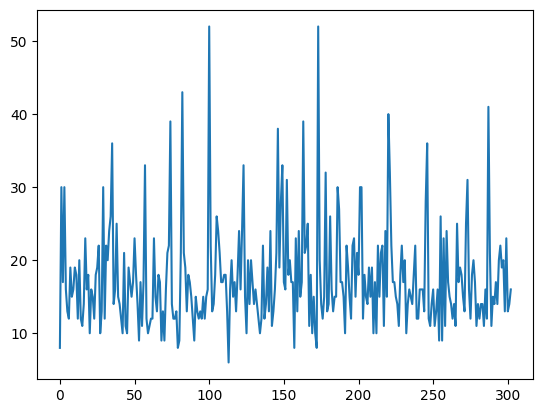

In [7]:
plt.figure(figsize=(7,5))
sn.countplot(x='CAD', data=disease_df,
             palette="BuGn_r")
plt.show()

laste = disease_df['BUN'].plot()
plt.show(laste)

sn.countplot(x='CAD', data=disease_df, palette="BuGn_r"): Membuat hitungan plot menggunakan seaborn ( sn)
laste = disease_df['BUN'].plot(): Membuat plot garis menggunakan matplotlib ( plt). Plot ini menampilkan nilai dalam kolom 'BUN' (Blood Urea Nitrogen) dari DataFrame disease_df.

In [8]:
X = np.asarray(disease_df[['Weight', 'Height','BMI',
                           'FBS','ESR','EF']])
y = np.asarray(disease_df['EX-Smoker'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
# Train-and-Test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3,random_state = 4)

print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (212, 6) (212,)
Test set: (91, 6) (91,)


menormalisasi dan membagi  data train dan test

In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evalution and accuracy
from sklearn.metrics import jaccard_score

print('')
print('Accuracy of the model in jaccard similarity score is =',
      jaccard_score(y_test, y_pred))

#this code is contributed by @amartajisce
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

score = rf.score(X_test,y_test)*100
print('Accuracy of the model is =',score)


Accuracy of the model in jaccard similarity score is = 0.0
Accuracy of the model is = 94.5054945054945


melakukan prediksi pada data latih dan data uji, dan kemudian menghitung skor kinerja model pada data uji.

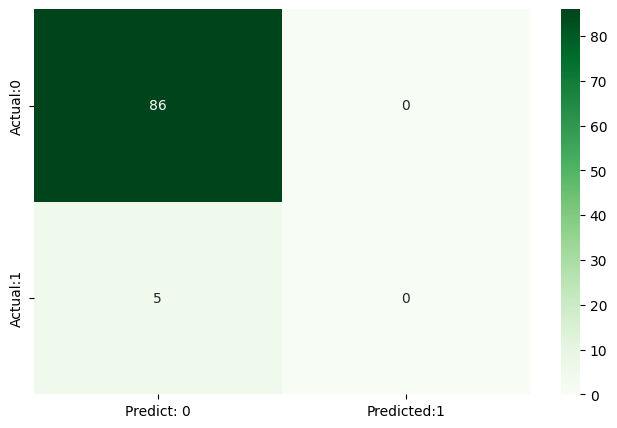

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        86
         1.0       0.00      0.00      0.00         5

    accuracy                           0.95        91
   macro avg       0.47      0.50      0.49        91
weighted avg       0.89      0.95      0.92        91



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predict: 0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

melakukan prediksi pada data latih dan data uji, dan kemudian menghitung skor kinerja model pada data uji.